In [2]:
from fast_rl.core.basic_train import AgentLearner
from fast_rl.agents.ddpg import *
from fast_rl.core.train import AgentInterpretation, GroupAgentInterpretation
from fast_rl.core.data_block import MDPDataBunch
from fast_rl.core.agent_core import *
from fast_rl.core.data_block import *
from fastai.basic_data import DatasetType
from fast_rl.core.metrics import *
from fastai.gen_doc.nbdoc import *

Can't import one of these: No module named 'pybullet'
Can't import one of these: No module named 'gym_maze'
Can't import one of these: No module named 'gym_minigrid'


In [3]:
show_doc(DDPGModule.__init__)

<h4 id="DDPGModule.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#DDPGModule-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`ni`**:`int`, **`ao`**:`int`, **`layers`**:`Collection`\[`int`\], **`discount`**:`float`=***`0.99`***, **`n_conv_blocks`**:`Collection`\[`int`\]=***`0`***, **`nc`**=***`3`***, **`opt`**=***`None`***, **`emb_szs`**:`ListSizes`=***`None`***, **`loss_func`**=***`None`***, **`w`**=***`-1`***, **`h`**=***`-1`***, **`ks`**=***`None`***, **`stride`**=***`None`***, **`grad_clip`**=***`5`***, **`tau`**=***`0.001`***, **`lr`**=***`0.001`***, **`actor_lr`**=***`0.0001`***, **`batch_norm`**=***`False`***, **\*\*`kwargs`**)

<div class="collapse" id="DDPGModule-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#DDPGModule-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Implementation of a discrete control algorithm using an actor/critic architecture. Notes:
        Uses 4 networks, 2 actors, 2 critics.
        All models use batch norm for feature invariance.
        NNCritic simply predicts Q while the Actor proposes the actions to take given a s s.

References:
        [1] Lillicrap, Timothy P., et al. "Continuous control with deep reinforcement learning."
        arXiv preprint arXiv:1509.02971 (2015).

Args:
        data: Primary data object to use.
        memory: How big the tree buffer will be for offline training.
        tau: Defines how "soft/hard" we will copy the target networks over to the primary networks.
        discount: Determines the amount of discounting the existing Q reward.
        lr: Rate that the opt will learn parameter gradients. 

In [4]:
data = MDPDataBunch.from_env('Pendulum-v0',render='rgb_array',bs=64,res_wrap=partial(ResolutionWrapper,w_step=4,h_step=4))
exploration_method = OrnsteinUhlenbeck(size=data.action.taken_action.shape, epsilon_start=1, 
                                       epsilon_end=0.1, decay=0.001)
memory = ExperienceReplay(memory_size=1000000, reduce_ram=True)
model = create_ddpg_model(data=data, base_arch=DDPGModule)
learner = ddpg_learner(data=data, model=model, memory=memory, exploration_method=exploration_method)
learner.fit(4)

epoch,train_loss,valid_loss,time
0,1.475903,0.743393,00:03
1,0.296961,0.179079,00:03
2,0.162334,0.137115,00:03
3,0.149649,0.131717,00:03


In [5]:
import os
def show_config_group(model_dirs):
    group_interp = GroupAgentInterpretation()
    for model_dir in model_dirs:
        for file in os.listdir(model_dir):
            file = file.replace('.pickle', '')
            group_interp.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
    group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)

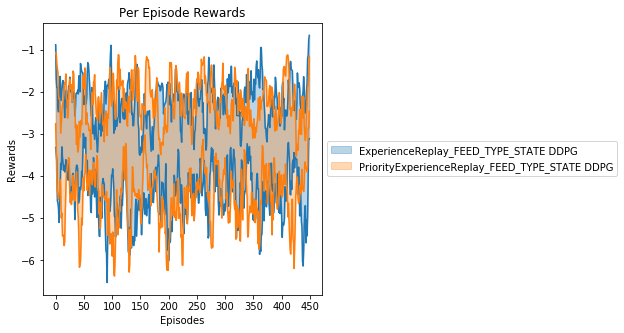

In [10]:
model_dirs = ['data/pendulum_ddpg']
show_config_group(model_dirs)

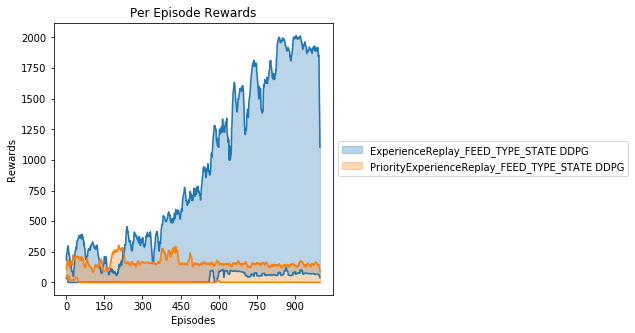

In [11]:
model_dirs = ['data/ant_ddpg']
show_config_group(model_dirs)

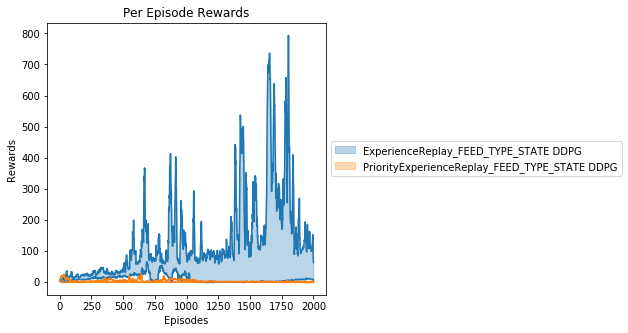

In [17]:
model_dirs = ['data/halfcheetah_ddpg']
show_config_group(model_dirs)